In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import numpy as np
import os
import selfies as sf
import exmol
import itertools
soldata = pd.read_csv('https://github.com/whitead/dmol-book/raw/master/data/curated-solubility-dataset.csv')
features_start_at = list(soldata.columns).index('MolWt')
np.random.seed(0)

In [2]:
# scramble them
# Reduced for CI!
soldata = soldata.sample(frac=0.15, random_state=0).reset_index(drop=True)
soldata.head()

,ID,Name,InChI,InChIKey,SMILES,Solubility,SD,Ocurrences,Group,MolWt,...,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT
0,B-4206,diuron,InChI=1S/C9H10Cl2N2O/c1-13(2)9(14)12-6-3-4-7(1...,XMTQQYYKAHVGBJ-UHFFFAOYSA-N,CN(C)C(=O)Nc1ccc(Cl)c(Cl)c1,-3.744300,1.227164,5,G4,233.098,...,1.0,76.0,1.0,0.0,0.0,1.0,32.34,92.603980,2.781208,352.665233
1,F-988,7-(3-amino-3-methylazetidin-1-yl)-8-chloro-1-c...,InChI=1S/C17H17ClFN3O3/c1-17(20)6-21(7-17)14-1...,DUNZFXZSFJLIKR-UHFFFAOYSA-N,CC1(N)CN(C2=C(Cl)C3=C(C=C2F)C(=O)C(C(=O)O)=CN3...,-5.330000,0.000000,1,G1,365.792,...,3.0,132.0,2.0,2.0,2.0,4.0,88.56,147.136366,2.001398,973.487509
2,C-1996,4-acetoxybiphenyl; 4-biphenylyl acetate,InChI=1S/C14H12O2/c1-11(15)16-14-9-7-13(8-10-1...,MISFQCBPASYYGV-UHFFFAOYSA-N,CC(=O)OC1=CC=C(C=C1)C2=CC=CC=C2,-4.400000,0.000000,1,G1,212.248,...,2.0,80.0,2.0,0.0,0.0,2.0,26.30,94.493449,2.228677,471.848345
3,A-3055,methane dimolybdenum,InChI=1S/CH4.2Mo/h1H4;;,JAGQSESDQXCFCH-UHFFFAOYSA-N,C.[Mo].[Mo],-3.420275,0.409223,2,G3,207.923,...,0.0,20.0,0.0,0.0,0.0,0.0,0.00,49.515427,-0.000000,2.754888
4,A-2575,ethyl 4-[[(methylphenylamino)methylene]amino]b...,InChI=1S/C17H18N2O2/c1-3-21-17(20)14-9-11-15(1...,GNGYPJUKIKDJQT-UHFFFAOYSA-N,CCOC(=O)c1ccc(cc1)N=CN(C)c2ccccc2,-5.450777,0.000000,1,G1,282.343,...,5.0,108.0,2.0,0.0,0.0,2.0,41.90,124.243431,2.028889,606.447052


In [3]:
selfies_list = [sf.encoder(exmol.sanitize_smiles(s)[1]) for s in soldata.SMILES]

In [4]:
len(selfies_list)

1497

In [5]:
#selfies_list = [''.join(list(sf.split_selfies(s))[:5]) for s in selfies_list]

In [6]:
symbol_counts = {'nop':0}
        
for s in selfies_list:
    #print(s)
    s_list = list(sf.split_selfies(s))    
    for token in s_list:
        if '.' in token:
            continue #?
        if token in symbol_counts:
            symbol_counts[token] += 1
        else:
            symbol_counts[token] = 1

symbol_counts = dict(sorted(symbol_counts.items(), key=lambda i: i[1]))
print(symbol_counts)
print()

vocab = list(symbol_counts.keys())
print(vocab)
print()
vocab_stoi = {o:i for o,i in zip(vocab, range(len(vocab)))}
print(vocab_stoi)
print()


{'nop': 0, '[Zrexpl]': 1, '[Cd+2expl]': 1, '[Seexpl]': 1, '[Sr+2expl]': 1, '[=Seexpl]': 1, '[Reexpl]': 1, '[Znexpl]': 1, '[=O+expl]': 1, '[Vexpl]': 1, '[SiHexpl]': 1, '[Mn+2expl]': 1, '[P+expl]': 1, '[I-expl]': 1, '[Mn+3expl]': 1, '[=Crexpl]': 1, '[=Feexpl]': 1, '[Mnexpl]': 1, '[=Znexpl]': 1, '[Laexpl]': 1, '[N-expl]': 1, '[Cu+2expl]': 1, '[=Cdexpl]': 1, '[Zr+2expl]': 1, '[Cr+3expl]': 1, '[=Coexpl]': 1, '[Hgexpl]': 1, '[Hg+expl]': 1, '[Y+3expl]': 1, '[=I]': 1, '[=Moexpl]': 1, '[Kexpl]': 1, '[Liexpl]': 1, '[Tiexpl]': 1, '[=Ceexpl]': 1, '[B-expl]': 1, '[Bexpl]': 1, '[=Caexpl]': 1, '[NH3+expl]': 1, '[Alexpl]': 1, '[Asexpl]': 1, '[NH2+expl]': 1, '[=Siexpl]': 1, '[MgH2expl]': 1, '[Hf+4expl]': 1, '[Rh+3expl]': 1, '[PHexpl]': 1, '[Ni+2expl]': 1, '[Auexpl]': 1, '[Cu+expl]': 1, '[Fe+2expl]': 1, '[C+expl]': 2, '[Zn+2expl]': 2, '[Lu+3expl]': 2, '[Mg+2expl]': 2, '[Cuexpl]': 2, '[=Pbexpl]': 2, '[Bi+3expl]': 2, '[=Mnexpl]': 2, '[H-expl]': 2, '[Clexpl]': 2, '[Sbexpl]': 2, '[Al+3expl]': 2, '[Expl=Ring

In [7]:
#Using vocab_stoi ordered by frequency for convenience

#vocab = list(sf.get_alphabet_from_selfies([s for s in selfies_list if s is not None]))
#vocab_stoi = {o:i for o,i in zip(vocab, range(len(vocab)))}
#print('Vocab size', len(vocab))

In [8]:
def selfies2ints(s):
    result = []
    for token in sf.split_selfies(s):
        if token == '.':
            continue #?
        if token in vocab_stoi:
            result.append(vocab_stoi[token])
        else:
            result.append(np.nan)
            #print('Warning')
    return result
def ints2selfies(v):
    return ''.join([vocab[i] for i in v])

# test them out
s = selfies_list[0]
print('selfies:', s)
v = selfies2ints(s)
print('selfies2ints:', v)
so = ints2selfies(v)
print('ints2selfes:', so)
assert so == s

selfies: [C][N][Branch1_1][C][C][C][Branch1_2][C][=O][N][C][=C][C][=C][Branch1_1][C][Cl][C][Branch1_1][C][Cl][=C][Ring1][Branch2_1]
selfies2ints: [119, 112, 117, 119, 119, 119, 115, 119, 113, 112, 119, 118, 119, 118, 117, 119, 110, 119, 117, 119, 110, 118, 116, 109]
ints2selfes: [C][N][Branch1_1][C][C][C][Branch1_2][C][=O][N][C][=C][C][=C][Branch1_1][C][Cl][C][Branch1_1][C][Cl][=C][Ring1][Branch2_1]


In [9]:
ints_list = [selfies2ints(s) for s in selfies_list]

In [10]:
max_len = max([len(i) for i in ints_list])
max_len

200

In [11]:
vocab_stoi['nop']

0

In [12]:
ints_list = list(zip(*itertools.zip_longest(*ints_list, fillvalue=int(0))))
ints_list = [list(i) for i in ints_list]
print(ints_list)

[[119, 112, 117, 119, 119, 119, 115, 119, 113, 112, 119, 118, 119, 118, 117, 119, 110, 119, 117, 119, 110, 118, 116, 109, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [119, 119, 117, 119, 112, 119, 112, 109, 111, 117, 119, 118, 117, 119, 102, 119, 118, 119, 115, 119, 113, 119, 117, 115, 119, 115, 119, 113, 114, 118, 112, 117, 115, 119, 119, 119, 116, 116, 119, 116, 108, 118, 111, 116, 119, 110, 119, 111, 116, 109, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Shapley for 1-gram model

In [13]:
def model_1gram(ints): # assuming input is an array of ints
    out = np.sum(ints,axis=1) # sum of each row in ints
    return out

In [14]:
prob_vector = np.array(list(symbol_counts.values()))
prob_vector = prob_vector/np.sum(prob_vector)
print(prob_vector)

[0.00000000e+00 2.49681656e-05 2.49681656e-05 2.49681656e-05
 2.49681656e-05 2.49681656e-05 2.49681656e-05 2.49681656e-05
 2.49681656e-05 2.49681656e-05 2.49681656e-05 2.49681656e-05
 2.49681656e-05 2.49681656e-05 2.49681656e-05 2.49681656e-05
 2.49681656e-05 2.49681656e-05 2.49681656e-05 2.49681656e-05
 2.49681656e-05 2.49681656e-05 2.49681656e-05 2.49681656e-05
 2.49681656e-05 2.49681656e-05 2.49681656e-05 2.49681656e-05
 2.49681656e-05 2.49681656e-05 2.49681656e-05 2.49681656e-05
 2.49681656e-05 2.49681656e-05 2.49681656e-05 2.49681656e-05
 2.49681656e-05 2.49681656e-05 2.49681656e-05 2.49681656e-05
 2.49681656e-05 2.49681656e-05 2.49681656e-05 2.49681656e-05
 2.49681656e-05 2.49681656e-05 2.49681656e-05 2.49681656e-05
 2.49681656e-05 2.49681656e-05 2.49681656e-05 4.99363312e-05
 4.99363312e-05 4.99363312e-05 4.99363312e-05 4.99363312e-05
 4.99363312e-05 4.99363312e-05 4.99363312e-05 4.99363312e-05
 4.99363312e-05 4.99363312e-05 4.99363312e-05 4.99363312e-05
 4.99363312e-05 4.993633

<AxesSubplot:ylabel='Count'>

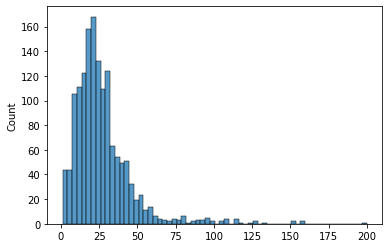

In [105]:
len_ints_list = sorted([len([i for i in k if i!=0]) for k in ints_list])
sns.histplot(data=len_ints_list)

In [110]:
print(len_ints_list)

[1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,

In [115]:
prob_len = [len_ints_list.count(i) for i in range(max_len+1)]
prob_len = prob_len/np.sum(prob_len)
print(prob_len)
print(len(prob_len))

[0.         0.00467602 0.00734803 0.00935204 0.00801603 0.00868403
 0.00668003 0.01402806 0.02137609 0.01870407 0.03006012 0.02738811
 0.0240481  0.02271209 0.02137609 0.03139613 0.02872411 0.03941216
 0.03406814 0.03206413 0.04008016 0.03139613 0.04074816 0.03206413
 0.03206413 0.0240481  0.0247161  0.03340013 0.01469606 0.02271209
 0.02204409 0.01603206 0.02204409 0.01469606 0.01269205 0.01469606
 0.01202405 0.01336005 0.01068804 0.01336005 0.01002004 0.00935204
 0.01336005 0.01068804 0.01002004 0.00801603 0.00267201 0.01068804
 0.00267201 0.00400802 0.00601202 0.00734803 0.00267201 0.00534402
 0.00267201 0.00334001 0.00133601 0.00267201 0.00400802 0.00133601
 0.00133601 0.00200401 0.00200401 0.         0.         0.000668
 0.00200401 0.00133601 0.000668   0.         0.000668   0.000668
 0.         0.00133601 0.000668   0.000668   0.000668   0.000668
 0.000668   0.00133601 0.00200401 0.000668   0.000668   0.
 0.         0.000668   0.         0.000668   0.         0.
 0.00200401 0.   

In [119]:
np.random.seed(10)
np.argmax(np.random.multinomial(1, prob_len,size=1),axis=-1)[0]

57

In [39]:
np.random.randint(max_len)

80

In [15]:
pred = model_1gram(ints_list)
expec_val = np.sum(pred)/len(pred)
print(expec_val)

3090.8937875751503


In [120]:
def shapley(instance_ints, feat, model, steps, use_rand=True, debug=False):
    instance_len = len(instance_ints)
    act_len = len([i for i in instance_ints if i!=0])
    #print(act_len)
    if feat >= instance_len:
        print("Error: feat >= seq_len")
        return exit(1)
    feat_int = instance_ints[feat]
    #np.random.seed(0)
    
    if debug: steps = 3
    
    if use_rand:
        # generate random sequences using prob vector
        #seq_ref = np.stack([np.argmax(np.random.multinomial(1, prob_vector, size=instance_len),axis=-1) for i in range(steps)])
        seq_ref = [np.argmax(np.random.multinomial(1, prob_vector, size=np.argmax(np.random.multinomial(1, prob_len,size=1),axis=-1)[0]),axis=-1) for i in range(steps)]
        #seq_ref = [np.argmax(np.random.multinomial(1, prob_vector, size=act_len),axis=-1) for i in range(steps)]
        seq_ref = np.stack([np.append(i, np.zeros(max_len - len(i))) for i in seq_ref])
    else:
        #uses ints_list
        #seq_ref = np.stack([s[:instance_len] for s in ints_list[:steps]])
        seq_ref = np.stack([s for s in ints_list[:steps]])
    
    if debug: 
        print("seq_ref")
        print(seq_ref)
        print()
    
    seq_p = seq_ref.copy()
    seq_m = seq_ref.copy()
    # set new_x[:] i to be x_i
    seq_p[:,feat] = feat_int
    if debug: 
        print("seq_p")
        print(seq_p)
        print()
        print("seq_m")
        print(seq_m)
        print()
    
    val_p = model(seq_p)
    val_m = model(seq_m)
    if debug: 
        print("val_p")
        print(val_p)
        print()
        print("val_m")
        print(val_m)
        print()
    
    result = np.sum(val_p-val_m)/steps
    
    return result

In [121]:
def s2int_pad(s):
    ints = selfies2ints(s)    
    ints.extend(np.zeros(max_len - len(ints)))
    return ints
    

In [122]:
instance = selfies_list[6]
instance_len = len(list(sf.split_selfies(instance)))
instance_ints = s2int_pad(instance)#.extend(np.zeros(max_len - instance_len))
print(instance_ints)
#instance_ints.extend(np.zeros(max_len - instance_len))
#print(instance_ints)
print(len(instance_ints))

[114, 118, 119, 118, 119, 118, 119, 118, 116, 115, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [124]:
instance = selfies_list[5]
instance_ints = s2int_pad(instance)
instance_len = len(instance_ints)

feat = 1
steps = 1400 # when using selifes_list/ints_list, make sure steps <= len(selfies_list)
model = model_1gram

print(instance)
print(instance_len)
print(instance_ints)
print()


print(shapley(instance_ints, feat, model, steps, True))
print()
print(shapley(instance_ints, feat, model, steps, False))

[N][#C][C][C][O]
200
[112, 100, 119, 119, 114, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

In [125]:
shap_val_1gram = [shapley(instance_ints, feat, model_1gram, steps, True) for feat in range(instance_len)]
print("shapley values (SV): ", shap_val_1gram)
print()
print("Sum of SV: ", np.sum(shap_val_1gram))
print("Expec(f): ", expec_val)
label =  model_1gram([instance_ints])[0]
print("f(s): ", label)
print("sum: ", np.sum(shap_val_1gram) + expec_val)

shapley values (SV):  [-3.3407142857142857, -15.187857142857142, 4.836428571428572, 5.688571428571429, 1.3385714285714285, -111.11571428571429, -109.24357142857143, -109.08285714285714, -106.90571428571428, -104.19714285714285, -99.32142857142857, -97.27785714285714, -94.33428571428571, -93.56, -90.73714285714286, -87.05214285714285, -82.525, -79.16642857142857, -74.755, -72.65285714285714, -64.40428571428572, -62.04571428571428, -57.46928571428571, -54.885714285714286, -49.402857142857144, -45.185, -45.68642857142857, -40.84642857142857, -37.83428571428571, -34.628571428571426, -34.59142857142857, -32.730714285714285, -29.389285714285716, -27.622857142857143, -22.55785714285714, -24.98357142857143, -25.06357142857143, -22.437857142857144, -18.689285714285713, -18.537857142857142, -16.98, -15.665, -13.301428571428572, -12.999285714285714, -13.822857142857142, -11.89, -11.808571428571428, -10.137857142857143, -9.947857142857142, -9.335, -8.58, -7.571428571428571, -9.938571428571429, -5.

In [126]:
shap_val_1gram_t = [shapley(instance_ints, feat, model_1gram, steps, False) for feat in range(instance_len)]
print("shapley values (SV): ", shap_val_1gram_t)
print()
print("Sum of SV: ", np.sum(shap_val_1gram_t))
print("Expec(f): ", expec_val)
label =  model_1gram([instance_ints])[0]
print("f(s): ", label)
print("sum: ", np.sum(shap_val_1gram_t) + expec_val)

shapley values (SV):  [-3.83, -14.472142857142858, 4.467142857142857, 4.6571428571428575, 1.6664285714285714, -111.61357142857143, -110.70285714285714, -109.19357142857143, -106.69214285714285, -104.425, -101.08, -97.80642857142857, -95.27, -92.98571428571428, -90.21214285714285, -86.83, -83.59785714285714, -78.79785714285714, -74.535, -70.96857142857142, -66.64928571428571, -62.955, -58.089285714285715, -54.628571428571426, -50.81928571428571, -47.83428571428571, -45.03357142857143, -41.08571428571429, -39.24357142857143, -36.49, -34.55285714285714, -32.43642857142857, -29.84357142857143, -28.069285714285716, -26.595714285714287, -24.757142857142856, -23.251428571428573, -21.797142857142855, -20.47714285714286, -18.859285714285715, -17.65357142857143, -16.542142857142856, -15.079285714285714, -13.782142857142857, -12.737857142857143, -11.78, -11.435714285714285, -10.131428571428572, -9.81, -9.173571428571428, -8.535714285714286, -7.77, -7.394285714285714, -6.804285714285714, -6.546428

   train_data  rand_data
0   -3.830000  -3.340714
1  -14.472143 -15.187857
2    4.467143   4.836429
3    4.657143   5.688571
4    1.666429   1.338571


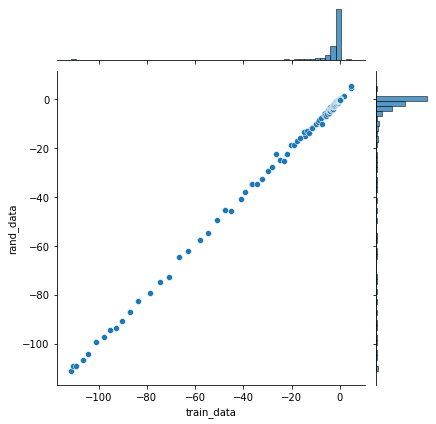

In [127]:
shap_data = pd.DataFrame([[shap_val_1gram_t[i], shap_val_1gram[i]] for i in range(instance_len)],columns =["train_data","rand_data"],dtype=float)
print(shap_data.head())
sns.jointplot(data=shap_data,x="train_data",y="rand_data")

<AxesSubplot:>

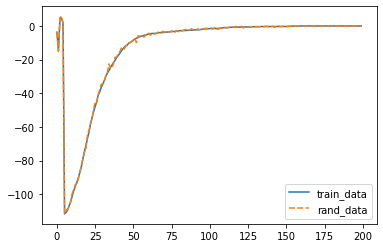

In [128]:
sns.lineplot(data=shap_data)

In [22]:
# implementation from https://link.springer.com/content/pdf/10.1007/s10115-013-0679-x.pdf
def shapley_sk(instance_ints, feat, model, steps, use_rand=True, debug=False):
    instance_len = len(instance_ints)
    if feat >= instance_len:
        print("Error: feat >= seq_len")
        return exit(1)
    feat_int = instance_ints[feat]
    #np.random.seed(0)
    
    if debug: steps = 3
    
    if use_rand:
        # generate random sequences using prob vector
        seq_ref = np.stack([np.argmax(np.random.multinomial(1, prob_vector, size=instance_len),axis=-1) for i in range(steps)])
    else:
        #uses ints_list
        # chop all ints to the length of the instance
        #seq_ref = np.stack([s[:instance_len] for s in ints_list[:steps]])
        seq_ref = np.stack([s for s in ints_list[:steps]])
    
    if debug: 
        print("seq_ref")
        print(seq_ref)
        print()
    
    # choice
    choice_p = np.stack([np.random.randint(2, size=instance_len) for i in range(steps)])
    choice_p[:,feat] = 1
    if debug: 
        print("choice_p")
        print(choice_p)
        print()
    
    choice_m = np.copy(choice_p)
    choice_m[:,feat] = 0
    if debug: 
        print("choice_m")
        print(choice_m)
        print()
    
    # shuffled x's based on choice
    
    seq_p = (instance_ints * choice_p) + (seq_ref * (1-choice_p))
    seq_m = (instance_ints * choice_m) + (seq_ref * (1-choice_m))
    if debug: 
        print("seq_p")
        print(seq_p)
        print()
        print("seq_m")
        print(seq_m)
        print()
    val_p = model(seq_p)
    val_m = model(seq_m)
    if debug: 
        print("val_p")
        print(val_p)
        print()
        print("val_m")
        print(val_m)
        print()
    result = np.sum(val_p-val_m)/steps
    
    return result

In [23]:
instance = selfies_list[7]
instance_ints = s2int_pad(instance)
instance_len = len(instance_ints)
feat = 1
steps = 1400 # when using selifes_list/ints_list, make sure steps <= len(selfies_list)
model = model_1gram

print(instance)
print(instance_len)
print(instance_ints)
print()


print(shapley_sk(instance_ints, feat, model, steps, True))
print(shapley_sk(instance_ints, feat, model, steps, False))

[C][C][C][C][C][C][C][C][=C][C][Branch1_2][C][=O][C][=C][C][Ring1][Branch1_3][Branch1_1][C][C][C][Ring1][N][Branch1_1][C][F][C][Branch1_1][C][O][C][C][Ring2][Ring1][C][Branch1_1][C][C][C][Ring2][Ring1][Branch1_2][Branch1_1][C][O][C][Branch1_2][C][=O][C][O]
200
[119, 119, 119, 119, 119, 119, 119, 119, 118, 119, 115, 119, 113, 119, 118, 119, 116, 105, 117, 119, 119, 119, 116, 112, 117, 119, 102, 119, 117, 119, 114, 119, 119, 111, 116, 119, 117, 119, 119, 119, 111, 116, 115, 117, 119, 114, 119, 115, 119, 113, 119, 114, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

In [24]:
shap_val_1gram = [shapley_sk(instance_ints, feat, model_1gram, steps, True) for feat in range(instance_len)]
print("shapley values (SV): ", shap_val_1gram)
print()
print("Sum of SV: ", np.sum(shap_val_1gram))
print("Expec(f): ", expec_val)
label =  model_1gram([instance_ints])[0]
print("f(s): ", label)
print("sum: ", np.sum(shap_val_1gram) + expec_val)

shapley values (SV):  [3.414285714285714, 3.0642857142857145, 3.2785714285714285, 3.3385714285714285, 3.777857142857143, 3.539285714285714, 3.8771428571428572, 3.6314285714285712, 2.4442857142857144, 3.31, -0.45571428571428574, 3.517857142857143, -2.4457142857142857, 3.3978571428571427, 2.6757142857142857, 3.1342857142857143, 0.7085714285714285, -10.58, 1.3292857142857142, 3.615, 3.1557142857142857, 3.4085714285714284, 0.5671428571428572, -3.6021428571428573, 1.562857142857143, 3.31, -13.557857142857143, 3.2264285714285714, 1.3585714285714285, 3.4785714285714286, -1.322857142857143, 3.6085714285714285, 3.3335714285714286, -4.4871428571428575, 0.5257142857142857, 3.172142857142857, 1.3742857142857143, 3.374285714285714, 3.43, 3.73, -4.6414285714285715, 0.40214285714285714, -0.13285714285714287, 1.1292857142857142, 3.717857142857143, -1.7014285714285715, 3.354285714285714, -0.6857142857142857, 3.287142857142857, -2.737857142857143, 3.4842857142857144, -1.74, -115.75428571428571, -115.614

In [25]:
shap_val_1gram = [shapley_sk(instance_ints, feat, model_1gram, steps, False) for feat in range(instance_len)]
print("shapley values (SV): ", shap_val_1gram)
print()
print("Sum of SV: ", np.sum(shap_val_1gram))
print("Expec(f): ", expec_val)
label =  model_1gram([instance_ints])[0]
print("f(s): ", label)
print("sum: ", np.sum(shap_val_1gram) + expec_val)

shapley values (SV):  [3.17, 4.527857142857143, 4.467142857142857, 4.6571428571428575, 6.666428571428572, 7.386428571428572, 8.297142857142857, 9.80642857142857, 11.307857142857143, 14.575, 13.92, 21.193571428571428, 17.73, 26.014285714285716, 27.787857142857142, 32.17, 32.402142857142856, 26.202142857142857, 42.465, 48.03142857142857, 52.35071428571428, 56.045, 57.910714285714285, 57.371428571428574, 66.18071428571429, 71.16571428571429, 56.96642857142857, 77.91428571428571, 77.75642857142857, 82.51, 79.44714285714285, 86.56357142857142, 89.15642857142858, 82.93071428571429, 89.40428571428572, 94.24285714285715, 93.74857142857142, 97.20285714285714, 98.52285714285715, 100.14071428571428, 93.34642857142858, 99.45785714285714, 99.92071428571428, 103.21785714285714, 106.26214285714286, 102.22, 107.56428571428572, 104.86857142857143, 109.19, 103.82642857142856, 110.46428571428571, 106.23, -7.394285714285714, -6.804285714285714, -6.546428571428572, -6.161428571428571, -6.007857142857143, -

In [130]:
error_data = []
steps = 1400
model = model_1gram
i=0
for instance in selfies_list[:100]:
    print(i)
    instance_ints = s2int_pad(instance)
    instance_len = len(instance_ints)
    shap_val_train = [shapley(instance_ints, feat, model_1gram, steps, False) for feat in range(instance_len)]
    shap_val_rand = [shapley(instance_ints, feat, model_1gram, steps, True) for feat in range(instance_len)]
    sum_sv_train = np.sum(shap_val_train) + expec_val
    sum_sv_rand = np.sum(shap_val_rand) + expec_val
    label = model_1gram([instance_ints])[0]
    err_train = (label-sum_sv_train)*100/label
    err_rand = (label-sum_sv_rand)*100/label
    error_data.append([i, instance, label, sum_sv_train, sum_sv_rand, err_train, err_rand])
    i+=1
    if False:
        print(instance)
        print(instance_ints)
        print(sum_sv," ",label)
        print(err)
        print()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [153]:
#errors = pd.DataFrame([[k[5],k[6]] for k in error_data],columns=["train","random"])
#errors.head()

In [154]:
errors_train = [k[5] for k in error_data]
errors_rand = [k[6] for k in error_data]

In [157]:
print(max(errors_train)," ", min(errors_train))
print(max(errors_rand)," ", min(errors_rand))

2278.978385342134   0.15038790981535613
7.695986737276343   -972.7359003721631


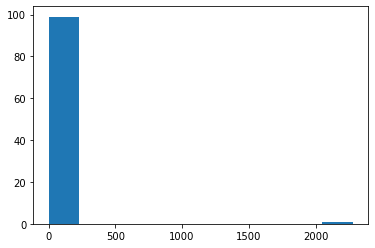

In [155]:
plt.hist(errors_train)
plt.show() 

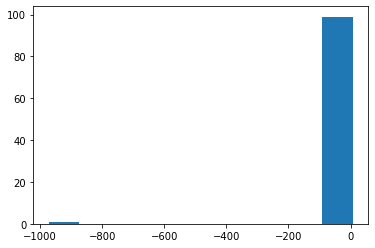

In [156]:
plt.hist(errors_rand)
plt.show() 

In [109]:
max(error)

[99,
 '[C][N][C][=C][C][=C][Branch2_1][Branch1_1][P][C][=C][C][=C][C][=C][Branch2_1][Ring2][O][N][C][=N][C][Branch2_1][Ring1][Ring2][N][C][=C][C][=C][Branch1_1][Branch2_2][S][Branch1_2][C][=O][Branch1_2][C][=O][O-expl][C][=C][Ring1][Branch2_3][=N][C][Branch1_1][Branch2_2][N][C][C][O][C][C][Ring1][Branch1_2][=N][Ring2][Ring1][Branch1_3][C][=C][Ring2][Ring1][=C][S][Branch1_2][C][=O][Branch1_2][C][=O][O-expl][C][Branch1_1][Branch2_2][S][Branch1_2][C][=O][Branch1_2][C][=O][O-expl][=C][Ring2][Ring2][=C].[C][C][=N][C][Branch2_1][Ring1][Ring2][N][C][=C][C][=C][Branch1_1][Branch2_2][S][Branch1_2][C][=O][Branch1_2][C][=O][O-expl][C][=C][Ring1][Branch2_3][=N][C][Branch1_1][Branch2_2][N][C][C][O][C][C][Ring1][Branch1_2][=N][Ring2][Ring1][Branch1_3].[Naexpl].[Naexpl].[Naexpl].[Naexpl]',
 15154.0,
 15131.210216146581,
 0.15038790981535613]